In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy
import tempfile
import pygraphviz
import matplotlib

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

numpy      : 1.23.5
scipy      : 1.10.0
pomegranate: 0.14.4

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [3]:
disease = DiscreteDistribution({'T': 0.2, 'F': 0.8})

In [4]:
# Conditional distribution for the c1 trait to appear in a probe
c1 = ConditionalProbabilityTable(
        [[ 'T','T', 0.3 ],
         [ 'T','F', 0.7 ],
         [ 'F','T', 0.2 ],
         [ 'F','F', 0.8 ]], [disease]) 

# Conditional distribution for the c2 trait to appear in a probe
c2 = ConditionalProbabilityTable(
        [[ 'T','T', 0.5 ],
         [ 'T','F', 0.5 ],
         [ 'F','T', 0.1 ],
         [ 'F','F', 0.9 ]], [disease]) 

In [5]:
b = State(disease, name="Disease")
t1 = State(c1, name="C1")
t2 = State(c2, name="C2")

In [6]:
def plot(model, filename=None):
        """Draw this model's graph using pygraphviz.
        Returns
        -------
        None
        """

        if pygraphviz is not None:
            G = pygraphviz.AGraph(directed=True)

            for state in model.states:
                G.add_node(state.name, color='red')

            for parent, child in model.edges:
                G.add_edge(parent.name, child.name)

            if filename is None:
                with tempfile.NamedTemporaryFile(mode='w+b') as tf: # w+b is default mode already, just to make sure
                    G.draw(tf, format='png', prog='dot')
                    img = matplotlib.image.imread(tf)
                    plt.imshow(img)
                    plt.axis('off')
            else:
                G.draw(filename, format='pdf', prog='dot')

        else:
            raise ValueError("must have matplotlib and pygraphviz installed for visualization")

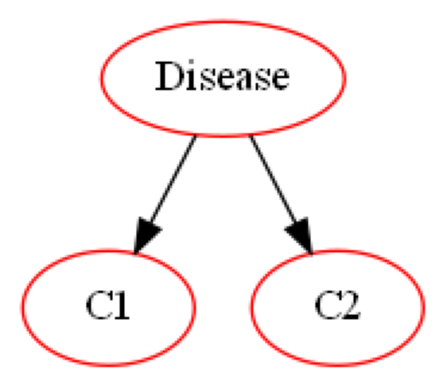

In [7]:
# Create the Bayesian network object
model = BayesianNetwork("Exercise 3: Laboratory probes")

# Add the states to the network 
model.add_states(b,t1,t2)

# Connect the states
model.add_edge(b,t1)
model.add_edge(b,t2)

# # Integrate everything
model.bake()

# #Draw the network
plot(model)

### In reteaua Bayesiana avem 3 noduri: Disease, C1 si C2. Nodurile C1 si C2 sunt legate printr-un arc de nodul Disease deoarece probabilitatea lor este conditionata de Disease. 
### C1 si C2 nu au legatura intre ele pentru ca sunt independente (C1 nu influenteaza C2 si vice-versa)

In [8]:
# P(B=True, C1=False)
model.probability(numpy.array(['T', 'F', None], ndmin=2))

0.14

In [9]:
# P(B=True, C1=False, C2=True)
model.probability(numpy.array(['T', 'F', 'T'], ndmin=2))

0.07

In [10]:
model.predict_proba(numpy.array([None, 'T', 'T'], ndmin=2))

[array([{
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "T" : 0.6521739130434784,
                    "F" : 0.3478260869565216
                }
            ],
            "frozen" : false
        }                                    , 'T', 'T'], dtype=object)]

### A doua probabilitate este mai mica deoarece prima ia in considerare ambele cazuri: C2 True si C2 False. A doua probabilitate se limiteaza la cazul in care C2 este True. C2 True given Disease este 0.5 => 0.5 din 0.14 = 0.07